# Resolución de ecuaciones diferenciales ordinarias.
Eva Martínez Palafox.

## Solución analítica de una ecuación. 
Resolver analíticamente la ecuación

$$
\frac{dy}{dx} = 5x^5 - 3x^2 
$$
con condición inicial: $y(x_0) =0$ con  $x_0 = 0$.

La resolvemos por variables separables:

$$
dy = (5x^5 - 3x^2)dx
$$
Integrando por los dos lados:


\begin{equation} \label{eq1}
\begin{split}
y(x)&= 5\int x^5dx - 3 \int x^2dx \\
    &= \frac{5}{6} x^6 - x^3 + c_1
\end{split}
\end{equation}

Usamos la condición inicial $y(x_0=0) =0$  para hallar el valor de $c_1$.
$$
\frac{5}{6} (0)^6 - (0)^3 + c_1 = 0
$$

de donde se tiene que $c_1=0$. Así, la solución es:
$$
y(x)=\frac{5}{6} x^6 - x^3.
$$

In [3]:
# Calculamos valores de la solución para comparar luego con los métodos numéricos.
import matplotlib.pyplot as plt
import numpy as np

def analitica(x): 
    y = (5.*x**6./6.) - x**3.       
    return y

Ahora, resolveremos de nuevo la ecuación diferencial en el intervalo [0,100], con la misma condición inicial y un paso de $h_1=10$ y $h2=0.01$, usando cada uno de los métodos: 

# Fórmula de Euler.

In [4]:
def euler(f, y_0, x):
    '''
    Recibe
    ----------
    f :  El lado derecho de la ecuación diferencial y'=f(t,y), y(t_0)=y_0
    y_0: Valor inicial y(x_0)=y_0 donde x_0 es el valor en el indice 0 del arreglo de las x 
    x :  Arreglo de las x. El paso se toma de x[n+1] - x[n].

    Regresa
    -------
    y : Arreglo con los valores aproximados de y usando el método de Euler.
    '''
    y = np.zeros(len(x))
    y[0] = y_0
    for n in range(0,len(x)-1):
        y[n+1] = y[n] + f(y[n],x[n])*(x[n+1] - x[n])
    return y

# Runge-Kutta de 2do. orden.

In [5]:
def RK2(f,y_0, x): 
    y = np.zeros(len(x))
    #print(len(y))
    y[0] = y_0
    h = x[1] - x[0]
    #print('h=',h)

    for n in range(0,len(x)-1):
        k1 = h * f(y[n],x[n])
        k2 = h * f(y[n] + k1, x[n] + h )           
        y[n+1] = y[n] + (k1 + k2)*0.5 
        #print(n,k1,k2)
    return y 

# Runge-Kutta de 4do. orden.

In [6]:
def RK4(f,y_0, x):
    y = np.zeros(len(x))
    #print(len(y))
    y[0] = y_0
    h = x[1] - x[0]
    h2 = h/2.0
    #print('h=',h)
          
    for n in range(0,len(x)-1):
        K1 = h*f(y[n], x[n])
        K2 = h*f(y[n] + 0.5*K1, x[n] + h)
        K3 = h*f(y[n] + 0.5*K2, x[n] + h)
        K4 = h*f(y[n] + K3, x[n] + h)
        #
        y[n+1] = y[n] + (1/6.0)*(K1 + 2*K2 + 2*K3 + K4)
        
    return y

# Comparación gráfica y conclusiones.
Una vez implementados los 3 métodos, representamos graficamente las soluciones para dos valores del paso distintos: 10 y 0.01. Comparamos con la solución analítica.

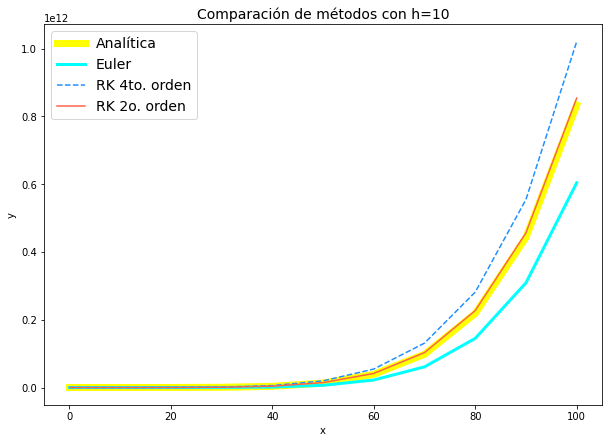

In [7]:
# Paso h=10
x = np.linspace(0,100, num=11)
#h=x[1]-x[0]
#print(h)

f = lambda y,x: 5*x**5 - 3*x**2 #La función dy/dx 
y_0=0

# Llamamos todos los métodos juntos:
y_a = analitica(x)
y_e = euler(f,y_0,x)
y_rk2 = RK2(f,y_0,x)
y_rk4 = RK4(f,y_0,x)

# ...y graficamos
plt.rcParams['figure.figsize'] = [10,7]
plt.plot(x,y_a, '-',linewidth=7, color='yellow', label='Analítica')   #sol. analítica
plt.plot(x,y_e, '-',linewidth=3, color='cyan', label='Euler')         #sol. euler
plt.plot(x,y_rk4, '--',color='dodgerblue', label='RK 4to. orden')     #sol. RK 4to. orden
plt.plot(x,y_rk2, '-', color='tomato', label='RK 2o. orden')            #sol. RK 2do. orden
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de métodos con h=10',fontsize=14)
plt.legend(fontsize='14')
plt.show()

En la siguiente tabla se muestra el valor de solución analítica, el de cada solución obtenida con cada método y la diferencia entre estos, para el caso h =10.

In [8]:
from tabulate import tabulate

headers = ['x', 'Analítica', 'Euler', 'E-error','RK4','RK4-error', 'RK2', 'RK2-error']    

table = zip(x, y_a, y_e, y_a - y_e, y_rk4, y_a - y_rk4, y_rk2, y_a - y_rk2)
print(tabulate(table, headers=headers, floatfmt="5.3e"))

        x    Analítica      Euler    E-error        RK4    RK4-error        RK2    RK2-error
---------  -----------  ---------  ---------  ---------  -----------  ---------  -----------
0.000e+00    0.000e+00  0.000e+00  0.000e+00  0.000e+00    0.000e+00  0.000e+00    0.000e+00
1.000e+01    8.323e+05  0.000e+00  8.323e+05  4.164e+06   -3.332e+06  2.498e+06   -1.666e+06
2.000e+01    5.333e+07  4.997e+06  4.833e+07  1.383e+08   -8.499e+07  8.499e+07   -3.167e+07
3.000e+01    6.075e+08  1.650e+08  4.425e+08  1.177e+09   -5.700e+08  7.725e+08   -1.650e+08
4.000e+01    3.413e+09  1.380e+09  2.033e+09  5.647e+09   -2.233e+09  3.940e+09   -5.267e+08
5.000e+01    1.302e+10  6.500e+09  6.521e+09  1.952e+10   -6.500e+09  1.431e+10   -1.292e+09
6.000e+01    3.888e+10  2.212e+10  1.675e+10  5.452e+10   -1.564e+10  4.156e+10   -2.685e+09
7.000e+01    9.804e+10  6.100e+10  3.704e+10  1.310e+11   -3.299e+10  1.030e+11   -4.982e+09
8.000e+01    2.185e+11  1.450e+11  7.341e+10  2.816e+11   -6.312e+10  

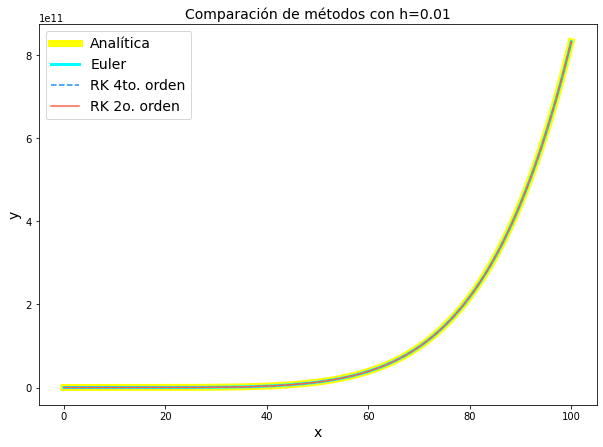

In [9]:
# Paso h=0.01
x = np.linspace(0,100, num=10001)
#h=x[1]-x[0]
#print(h)

f = lambda y,x: 5*x**5 - 3*x**2 #La función dy/dx 
y_0=0

# Llamamos todos los métodos juntos:
y_a = analitica(x)
y_e = euler(f,y_0,x)
y_rk2 = RK2(f,y_0,x)
y_rk4 = RK4(f,y_0,x)

# ...y graficamos
plt.rcParams['figure.figsize'] = [10,7]
plt.plot(x,y_a, '-',linewidth=7, color='yellow', label='Analítica')   #sol. analítica
plt.plot(x,y_e, '-',linewidth=3, color='cyan', label='Euler')         #sol. euler
plt.plot(x,y_rk4, '--',color='dodgerblue', label='RK 4to. orden')     #sol. RK 4to. orden
plt.plot(x,y_rk2, '-', color='tomato', label='RK 2o. orden')            #sol. RK 2do. orden
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.title('Comparación de métodos con h=0.01',fontsize=14)
plt.legend(fontsize='14')
plt.show()

En la siguiente tabla se muestra el valor de solución analítica, el de cada solución obtenida con cada método y la diferencia entre estos.\
Para el caso h =0.01.

<font color='red'>Warning: Es una tablota!!</font>

In [291]:
from tabulate import tabulate

headers = ['x', 'Analítica', 'Euler', 'E-error','RK4','RK4-error', 'RK2', 'RK2-error']    

table = zip(x, y_a, y_e, y_a - y_e, y_rk4, y_a - y_rk4, y_rk2, y_a - y_rk2)
#Descomentar para imprimir el error.
#print(tabulate(table, headers=headers, floatfmt="5.3e"))

# Hacer un cambio de variable para obtener dos ecuaciones diferenciales ordinarias de primer orden y resolverlas simultáneamente.

Dada la ecuación diferencial de segundo orden:

$$
y''(x) = cos(x) + 3y
$$

con condiciones iniciales $y(1) = -5$ y $y'(1)=2$. Considerar el intervalo [1, 5]. 

Consideremos los siguientes cambios de variable:

\begin{equation}
\begin{split}
y  &= w_1 \\
y' &= w'_1 =w_2 \\
y''&= w''_1 = w'_2
\end{split}
\end{equation}

Reescribimos en términos de las w's, para obtener un sistema de EDO de primer orden acopladas.
\begin{equation}
\begin{split}
w'_1 &= w_2\\
w'_2 &= 3w_1 + 2cos(x)
\end{split}
\end{equation}


con condiciones iniciales

\begin{equation}
\begin{split}
w_1(x=1) &= -5 \\
w_2(x=1) &= 2 
\end{split}
\end{equation}
Para resolver este sistema de EDO de primer orden acopladas, primero se define una función que las representa, luego asociamos sus condiciones iniciales, y usamos la nueva función como argumento para la función ```odeint``` de ```scipy``` que en realidad recupera y usa la libreria de ```FORTRAN - odepack```  y su función ```lsoda```.

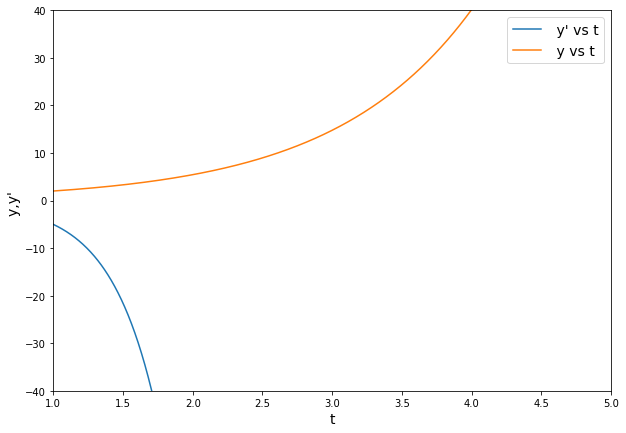

In [294]:
### Hacer un cambio de variable para obtener dos ecuaciones diferenciales
### ordinarias de primer orden y resolver:
###
### d2y/dx2 = cos(x) + 3y 
###
### En el intervalo [1,5] y sabiendo que
###
### y(1)=-5
### dy/dx(1) = 2
###
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Una función que representa a las ecuaciones diferenciales acopladas
def Funcion(x,t):
    w1 = x[0]
    w2 = x[1]
    dw2dt = 3*w1 + 2*np.cos(t)
    dw1dt = w2
    return (dw2dt,dw1dt)

# las condiciones iniciales son:
x0 = [-5,2] # cuando t=1
#test
#print(Funcion([-5,2],1))

t = np.linspace(1,5, num=1000)
#print(t)

#Solve a system of ordinary differential equations using lsoda from the FORTRAN library odepack.
#Solves the initial value problem for stiff or non-stiff systems of first order ode-s:
X = odeint(Funcion,x0,t)

w2 = X[:,0]   #y'
w1 = X[:,1]   #y

plt.plot(t,w2, label=' y\' vs t')
plt.plot(t,w1, label=' y vs t' )
plt.xlim(1,5)
plt.ylim(-40,40)
plt.xlabel('t', fontsize="14")
plt.ylabel('y,y\' ', fontsize="14")
plt.legend(fontsize='14')